# Boundary value problem

### In general case:

$L[y]=y''+p(x)y+q(x)y=f(x)$

$l_a[y]=\alpha_0y(a)+\alpha_1y'(a)=A$

$l_b[y]=\beta_0y(b)+\beta_1y'(b)=B$

for $x\in[a,b]$

## 1. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}-\frac{dy}{dx}\ln(x)-2y=1$ for $x \in [0.5,1.5]$

### with the boundary conditions:

$y(0.5)+y'(0.5)=1$, $y(1.5)-y'(1.5)=0$

1.1. Solve this problem using finite difference method of the second order. Use the uniform grid. Is this method stable for step size $h=0.125$? Find number of grid points required to achieve accuracy of the order of 1e-6.

### *Don't forget to include the boundary conditions!*

1.2. Use the first order one-sided numerical approximation for the first derivative and write a new scheme. Find number of grid points required to achieve accuracy of the order of 1e-6.

1.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

#1.1.
def SecondOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    h = 0.125
    x = np.linspace(a, b, N)
    y = np.zeros(N)
    F = np.zeros(N)
    M = np.zeros((N, N))
    
    M[0][0] = alpha[0] - alpha[1] / h
    M[0][1] = alpha[1] / h
    F[0] = A
    

    M[1][2] = p(x[1]) / (2*h)
    M[1][0] = -M[1][2]
    M[1][1] = q(x[1]) - 1/ (2*h**2)
    M[1][3] = 1 / (2*h**2)
    F[1] = f(x[1])
    
    M[N-2][N-1] = p(x[N-2]) / (2*h)
    M[N-2][N-3] = -M[N-2][N-1] 
    M[N-2][N-4] = -1 / (2*h**2)
    M[N-2][N-2] = q(x[N-2]) + 1/(2*h**2)
    F[N-2] = f(x[N-2])
    
    M[N-1][N-1] = beta[0] + beta[1] / h
    M[N-1][N-2] = -beta[1] / h
    F[N-1] = B
    
    for i in range(2, N - 2):
        M[i][i] = q(x[i])
        M[i][i+1] = p(x[i]) / (2*h)
        M[i][i-1] = - M[i][i+1]
        M[i][i+2] = 1 / (4*h**2)
        M[i][i-2] = -M[i][i+2]
        F[i] = f(x[i])
    y = solve(M, F)
    return y, x

#1.2.
def FirstOrderScheme(a,b,A,B,alpha,beta,p,q,f,N=100):
    # in:
    # a,b - float, limits of x, N - int, number of grid points
    # A,B - float, boundary values
    # alpha, beta - array of float, coefficients for boundary conditions in general case
    # p(x), g(x), f(x) - functions from general equation
    
    #you can construct matrix of the system and use scipy.linalg.solve method to solve it: y=solve(M,f)
    
    # out: 
    # y - array of float, solution of the BVP
    h = 0.125
    x = np.linspace(a, b, N)
    y = np.zeros(N)
    F = np.zeros(N)
    M = np.zeros((N, N))
    
    for i in range(N - 4):
        M[i][i] = q(x[i]) - 1.5 / h + 2.25 / h**2
        M[i][i+1] = p(x[i]) * (2/h - 6/h**2)
        M[i][i+2] = -0.5/h + 5.5 / h**2
        M[i][i+3] = -2 / h**2
        M[i][i+4] = 0.25/h**2
        F[i] = f(x[i])
    M[0][0] = alpha[0] - alpha[1] / h
    M[0][1] = alpha[1] / h
    F[0] = A
    M[N-1][N-1] = beta[0] + beta[1] / h
    M[N-1][N-2] = -beta[1] / h
    F[N-1] = B
    
    M[N-4][N-4] = q(x[N-4]) - 1.5 / h + 2.25 / h**2
    M[N-4][N-3] = p(x[N-4]) * (2/h - 6/h**2)
    M[N-4][N-2] = -0.5/h + 5.5 / h**2
    M[N-4][N-1] = -1.75 / h**2
    F[N-4] = f(x[N-4])
    
    M[N-3][N-3] = q(x[N-3]) - 1.5 / h + 2.25 / h**2
    M[N-3][N-2] = p(x[N-3]) * (2/h - 6/h**2)
    M[N-3][N-1] = -0.5/h + 5.5 / h**2
    F[N-3] = f(x[N-3])
    
    M[N-2][N-2] = q(x[N-2]) - 1.5 / h + 2.25 / h**2
    M[N-2][N-1] = p(x[N-2]) * (1.5/h - 3.75/h**2)
    F[N-2] = f(x[N-2])
    
    y = solve(M, F)
    return y, x

<IPython.core.display.Javascript object>


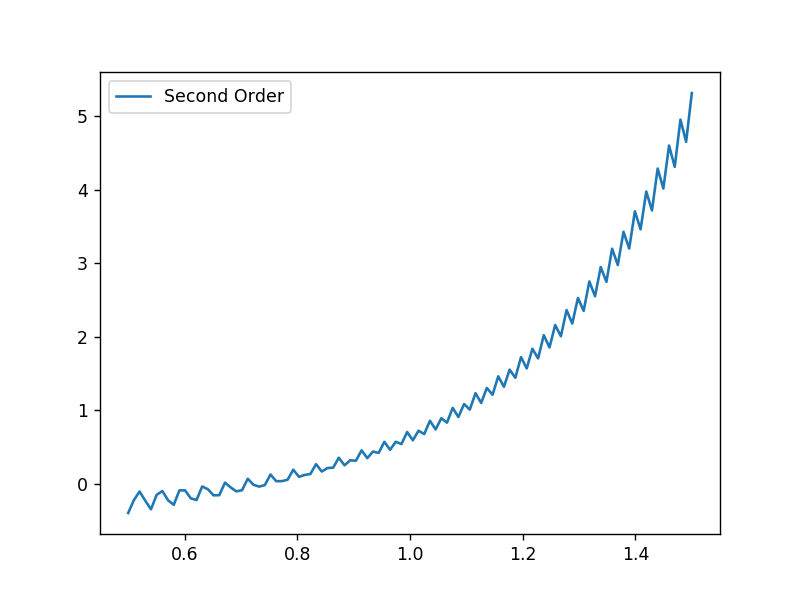

F:\StrangerZ\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:101: LinAlgWarning: Ill-conditioned matrix (rcond=4.26112e-217): result may not be accurate.


<IPython.core.display.Javascript object>


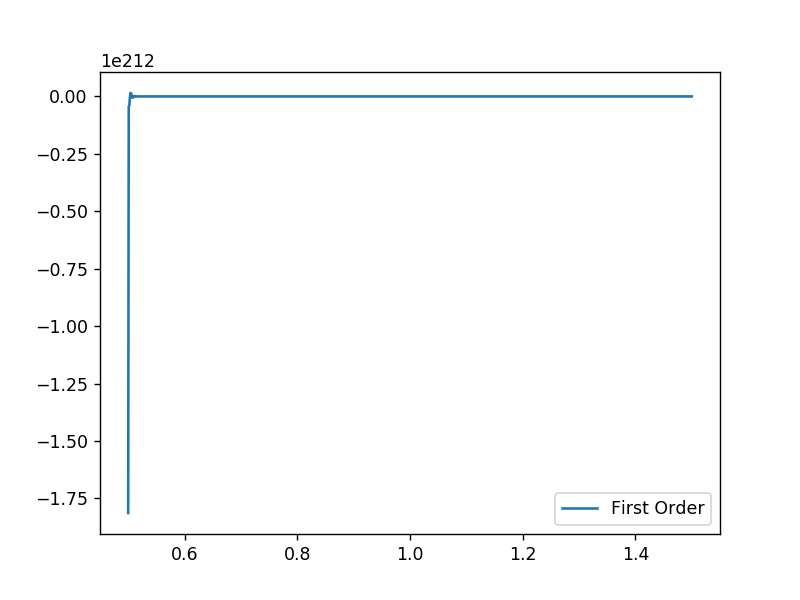

In [30]:
from math import log

plt.figure()
y1, x1 = SecondOrderScheme(a = 0.5,b = 1.5,A = 1,B = 0,alpha = [1,1],beta = [1,-1],p = lambda x:-log(x),q = lambda x: -2,f = lambda x:1,N=100)
y2, x2 = FirstOrderScheme(a = 0.5,b = 1.5,A = 1,B = 0,alpha = [1,1],beta = [1,-1],p = lambda x:-log(x),q = lambda x: -2,f = lambda x:1,N=1000)

plt.plot(x1,y1, label = 'Second Order')
plt.legend()
plt.show()

plt.figure()
plt.plot(x2,y2, label = 'First Order')
plt.legend()
plt.show()



# 2. Consider the following boundary value problem:

$\frac{d^2y}{dx^2}+2\frac{dy}{dx}-3xy=\frac{2-8x}{x^3}$ for $x \in [1,2]$

### with the boundary conditions:

$y(1)=1$, $y(2)=0.5$

2.1. Solve this problem using finite difference method of the second order. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.2. Solve this problem using Galerkin method with power basis functions. Find number of grid points required to achieve accuracy of the order of 1e-6.

2.3. Plot the solutions of both methods on the same figure. Compare results and discuss differences (if occurs).

<IPython.core.display.Javascript object>


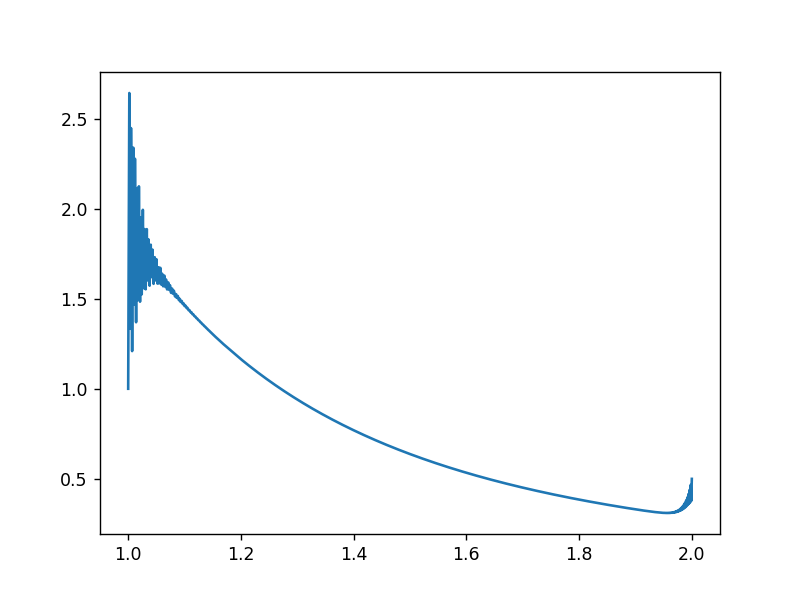

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

%matplotlib notebook

y, x = SecondOrderScheme(a = 1,b = 2,A = 1,B = 0.5,alpha = [1,0],beta = [1,0],p = lambda x:2,q = lambda x: -3*x,f = lambda x:(2-8*x)/x**3,N=1000)
plt.figure()
plt.plot(x, y)
plt.show()